<a href="https://colab.research.google.com/github/QuangMinh07112003/My-Projects/blob/main/spaceshiptitanic_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install hvplot

In [ ]:
!pip install bokeh

In [ ]:
!pip install colorama

In [ ]:
import pandas as pd
import holoviews as hv



In [ ]:
train = pd.read_csv('/content/titanic train.csv')
train


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
# Step 1: Select only the numeric columns
num_cols = train.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Calculate Q1 and Q3 for each numeric column
Q1 = train[num_cols].quantile(0.005)
Q3 = train[num_cols].quantile(0.995)

# Step 3: Replace values that are lower or higher than Q1 and Q3 respectively with the nearest quantile
for col in num_cols:
    train.loc[train[col] < Q1[col], col] = Q1[col]
    train.loc[train[col] > Q3[col], col] = Q3[col]


In [ ]:
test = pd.read_csv('/content/titanic test.csv')
test


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [ ]:
# Step 1: Select only the numeric columns
num_cols_test = test.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Calculate Q1 and Q3 for each numeric column in the test set
Q1_test = test[num_cols_test].quantile(0.005)
Q3_test = test[num_cols_test].quantile(0.995)

# Step 3: Replace values that are lower or higher than Q1 and Q3 respectively with the nearest quantile
for col in num_cols_test:
    test.loc[test[col] < Q1_test[col], col] = Q1_test[col]
    test.loc[test[col] > Q3_test[col], col] = Q3_test[col]

In [ ]:
# Assuming 'train' is your DataFrame containing the dataset
column_types = train.dtypes

print(column_types)

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
cluster           int32
dtype: object


<Axes: xlabel='HomePlanet'>

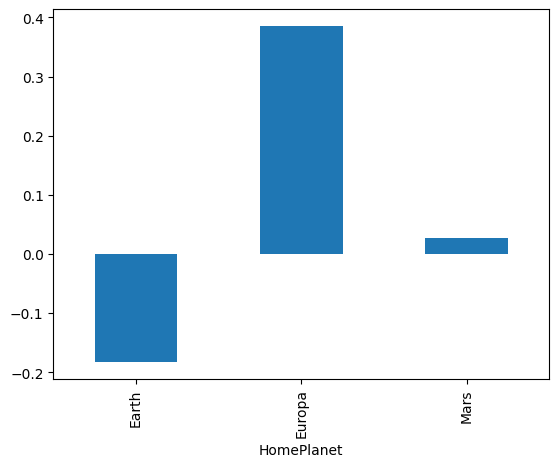

In [ ]:
train.groupby('HomePlanet').Age.mean().plot.bar()

<Axes: xlabel='HomePlanet'>

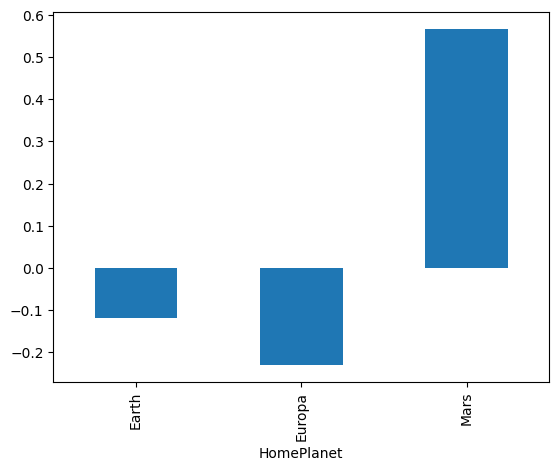

In [ ]:
train.groupby('HomePlanet').RoomService.mean().plot.bar()

<Axes: xlabel='HomePlanet'>

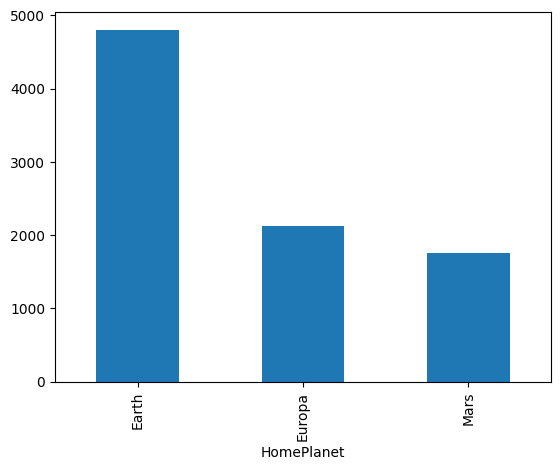

In [ ]:
train.groupby('HomePlanet').Transported.count().plot.bar()

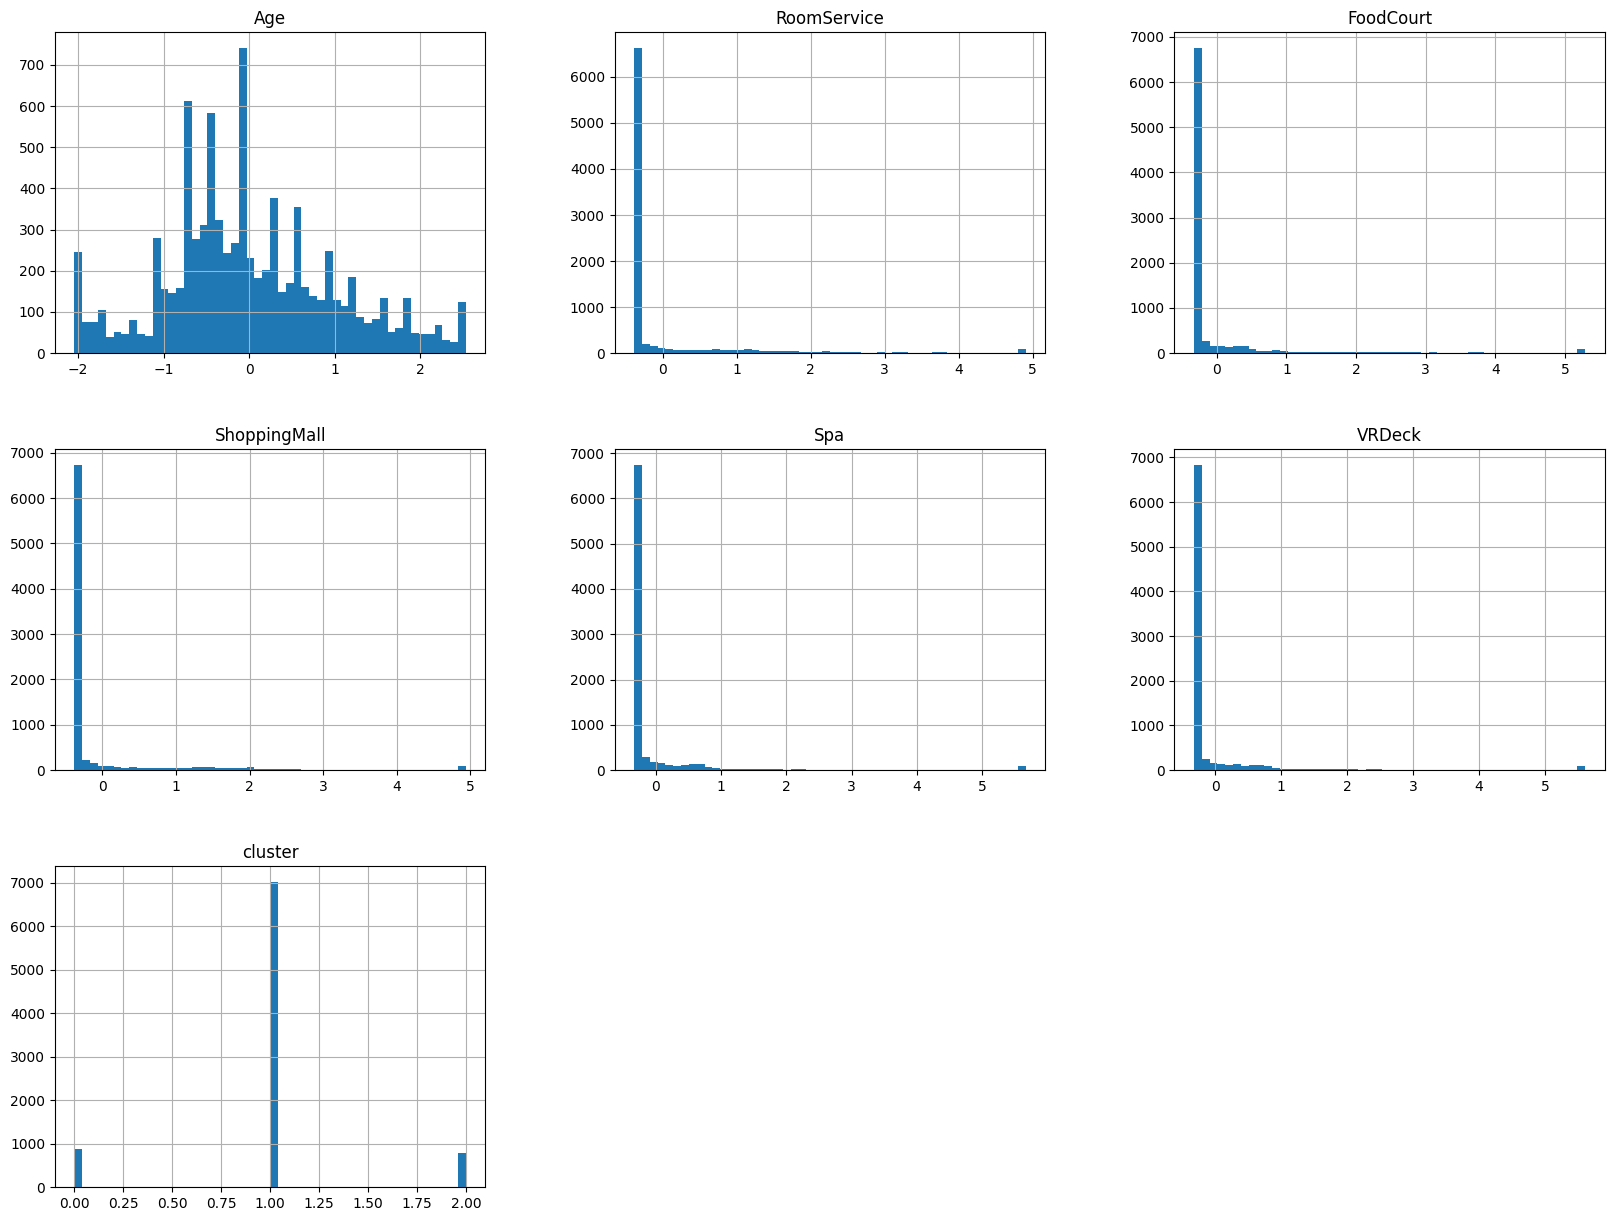

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

train.hist(bins=50, figsize=(20, 15));

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import statsmodels.api as sm
import pandas as pd

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
from sklearn.impute import SimpleImputer

num_cols = train.select_dtypes(include=['float64', 'int64']).columns
cat_cols = train.select_dtypes(include=['object']).columns

# Impute numerical columns with standard scaler
num_imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()
train[num_cols] = num_imputer.fit_transform(train[num_cols])

train[num_cols] = scaler.fit_transform(train[num_cols])


# Impute categorical and binary columns with the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
train[cat_cols] = cat_imputer.fit_transform(train[cat_cols])










# label_encoder = LabelEncoder()

# cat_columns = ['PassengerId', 'HomePlanet', 'CryoSleep','Cabin', 'Destination', 'VIP', 'Name']
# num_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# # Create a new dataset with selected columns
# categorical_variable = train[cat_columns]

# categorical_variable

In [ ]:
from sklearn.cluster import KMeans

# Step 1: Select only the numeric columns for clustering
num_cols = train.select_dtypes(include=['float64', 'int64'])

# Step 2: Choose the number of clusters (k)
num_clusters = 10  # You can adjust this based on your requirements

# Step 3: Instantiate the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

# Step 4: Fit the model to the data and predict the cluster labels
train['cluster'] = kmeans.fit_predict(num_cols)

# Now the 'train' DataFrame has an additional 'cluster' column indicating the assigned cluster for each data point

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


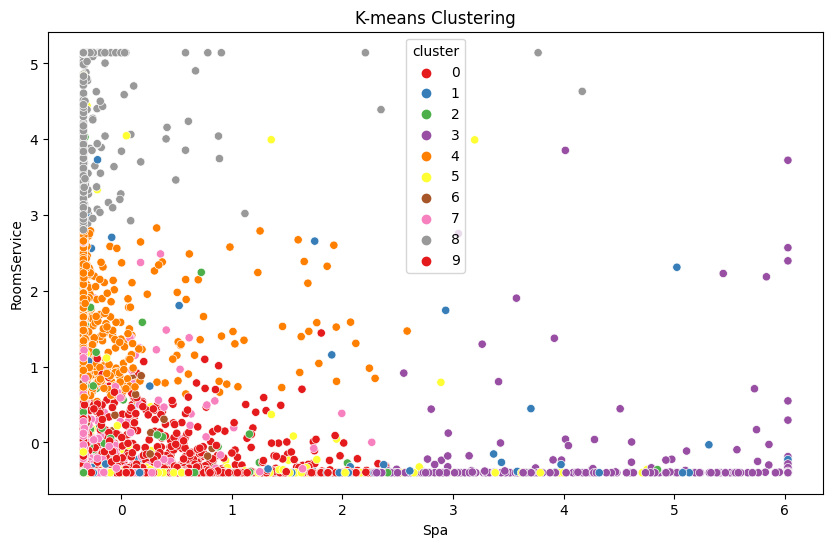

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already performed K-means clustering and added the 'cluster' column to the 'train' DataFrame

# Step 1: Create a scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Spa', y='RoomService', data=train, hue='cluster', palette='Set1')
plt.title('K-means Clustering')

# Step 2: Show the plot
plt.show()

In [ ]:
train.isnull(). sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
cluster         0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_cols = test.select_dtypes(include=['float64', 'int64']).columns
cat_cols = test.select_dtypes(include=['object']).columns

# Impute numerical columns with standard scaler
num_imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()
test[num_cols] = num_imputer.fit_transform(test[num_cols])
test[num_cols] = scaler.fit_transform(test[num_cols])

# Impute categorical and binary columns with the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
test[cat_cols] = cat_imputer.fit_transform(test[cat_cols])


In [ ]:
test.isnull(). sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
model = LogisticRegression()


In [ ]:
X_train = train.drop("Transported", axis=1)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,cluster
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,0.747106,False,-0.399081,-0.344194,-0.388024,-0.340937,-0.337277,Maham Ofracculy,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,-0.326913,False,-0.162701,-0.335421,-0.317021,0.449847,-0.271645,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,2.107531,True,-0.305830,3.141509,-0.388024,6.028557,-0.264186,Altark Susent,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,0.317499,False,-0.399081,0.906409,0.665648,4.454182,-0.049388,Solam Susent,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,-0.899723,False,0.258011,-0.275961,0.040829,0.472893,-0.334294,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,0.890309,True,-0.399081,5.742726,-0.388024,2.025654,-0.226895,Gravior Noxnuther,2
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,-0.756521,False,-0.399081,-0.344194,-0.388024,-0.340937,-0.337277,Kurta Mondalley,1
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,-0.183710,False,-0.399081,-0.344194,4.928617,-0.339497,-0.337277,Fayey Connon,0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,0.245897,False,-0.399081,0.678318,-0.388024,0.167527,4.488229,Celeon Hontichre,2


In [ ]:
X_train = train.drop("Transported", axis=1)
y_train = train["Transported"]


In [ ]:
X_test = test


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,-0.114147,False,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,-0.684313,False,-0.357339,-0.277879,-0.312173,2.287504,-0.246712,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,0.170937,False,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,0.669832,False,-0.357339,4.121518,-0.312173,-0.104002,0.226648,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,-0.613042,False,-0.340723,-0.283840,0.832122,-0.267841,-0.246712,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,0.384749,False,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,Jeron Peter
4273,9269_01,Earth,False,G/160/P,TRAPPIST-1e,0.954916,False,-0.357339,0.277095,-0.281538,-0.258790,-0.130193,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,-0.185417,False,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,TRAPPIST-1e,-0.185417,False,-0.357339,1.491019,-0.312173,-0.267841,0.176479,Kitakan Conale


In [ ]:
X_train1 = X_train.drop("PassengerId", axis=1)
X_train2 = X_train1.drop("Name", axis = 1)
X_train2

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,cluster
0,Europa,False,B/0/P,TRAPPIST-1e,0.747106,False,-0.399081,-0.344194,-0.388024,-0.340937,-0.337277,1
1,Earth,False,F/0/S,TRAPPIST-1e,-0.326913,False,-0.162701,-0.335421,-0.317021,0.449847,-0.271645,1
2,Europa,False,A/0/S,TRAPPIST-1e,2.107531,True,-0.305830,3.141509,-0.388024,6.028557,-0.264186,2
3,Europa,False,A/0/S,TRAPPIST-1e,0.317499,False,-0.399081,0.906409,0.665648,4.454182,-0.049388,2
4,Earth,False,F/1/S,TRAPPIST-1e,-0.899723,False,0.258011,-0.275961,0.040829,0.472893,-0.334294,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,0.890309,True,-0.399081,5.742726,-0.388024,2.025654,-0.226895,2
8689,Earth,True,G/1499/S,PSO J318.5-22,-0.756521,False,-0.399081,-0.344194,-0.388024,-0.340937,-0.337277,1
8690,Earth,False,G/1500/S,TRAPPIST-1e,-0.183710,False,-0.399081,-0.344194,4.928617,-0.339497,-0.337277,0
8691,Europa,False,E/608/S,55 Cancri e,0.245897,False,-0.399081,0.678318,-0.388024,0.167527,4.488229,2


In [ ]:
X_test1 = X_test.drop("PassengerId", axis=1)
X_test2 = X_test1.drop("Name", axis = 1)
X_test2

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,G/3/S,TRAPPIST-1e,-0.114147,False,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712
1,Earth,False,F/4/S,TRAPPIST-1e,-0.684313,False,-0.357339,-0.277879,-0.312173,2.287504,-0.246712
2,Europa,True,C/0/S,55 Cancri e,0.170937,False,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712
3,Europa,False,C/1/S,TRAPPIST-1e,0.669832,False,-0.357339,4.121518,-0.312173,-0.104002,0.226648
4,Earth,False,F/5/S,TRAPPIST-1e,-0.613042,False,-0.340723,-0.283840,0.832122,-0.267841,-0.246712
...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,G/1496/S,TRAPPIST-1e,0.384749,False,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712
4273,Earth,False,G/160/P,TRAPPIST-1e,0.954916,False,-0.357339,0.277095,-0.281538,-0.258790,-0.130193
4274,Mars,True,D/296/P,55 Cancri e,-0.185417,False,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712
4275,Europa,False,D/297/P,TRAPPIST-1e,-0.185417,False,-0.357339,1.491019,-0.312173,-0.267841,0.176479


In [ ]:
# Check the feature names in the training set
print("Training set feature names:", X_train2.columns)

# Check the feature names in the test set
print("Test set feature names:", X_test2.columns)

Training set feature names: Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'cluster'],
      dtype='object')
Test set feature names: Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')


In [ ]:
X_train_encoded = pd.get_dummies(X_train2)

X_test_encoded = pd.get_dummies(X_test2)

X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)


In [ ]:
X_train_encoded



,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,cluster,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Cabin_T/0/P,Cabin_T/1/P,Cabin_T/2/P,Cabin_T/2/S,Cabin_T/3/P,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,0.747106,-0.399081,-0.344194,-0.388024,-0.340937,-0.337277,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0
1,-0.326913,-0.162701,-0.335421,-0.317021,0.449847,-0.271645,1,1,0,0,...,0,0,0,0,0,0,0,1,1,0
2,2.107531,-0.305830,3.141509,-0.388024,6.028557,-0.264186,2,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,0.317499,-0.399081,0.906409,0.665648,4.454182,-0.049388,2,0,1,0,...,0,0,0,0,0,0,0,1,1,0
4,-0.899723,0.258011,-0.275961,0.040829,0.472893,-0.334294,1,1,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.890309,-0.399081,5.742726,-0.388024,2.025654,-0.226895,2,0,1,0,...,0,0,0,0,0,1,0,0,0,1
8689,-0.756521,-0.399081,-0.344194,-0.388024,-0.340937,-0.337277,1,1,0,0,...,0,0,0,0,0,0,1,0,1,0
8690,-0.183710,-0.399081,-0.344194,4.928617,-0.339497,-0.337277,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
8691,0.245897,-0.399081,0.678318,-0.388024,0.167527,4.488229,2,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [ ]:
clf = DecisionTreeClassifier()


In [ ]:
clf.fit(X_train_encoded, y_train)  # For classification


DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(X_test_encoded)  # For classification
y_pred

array([ True, False,  True, ...,  True,  True, False])

In [ ]:
arr_bool = y_pred.astype(bool)

print(arr_bool)

[ True False  True ...  True  True False]


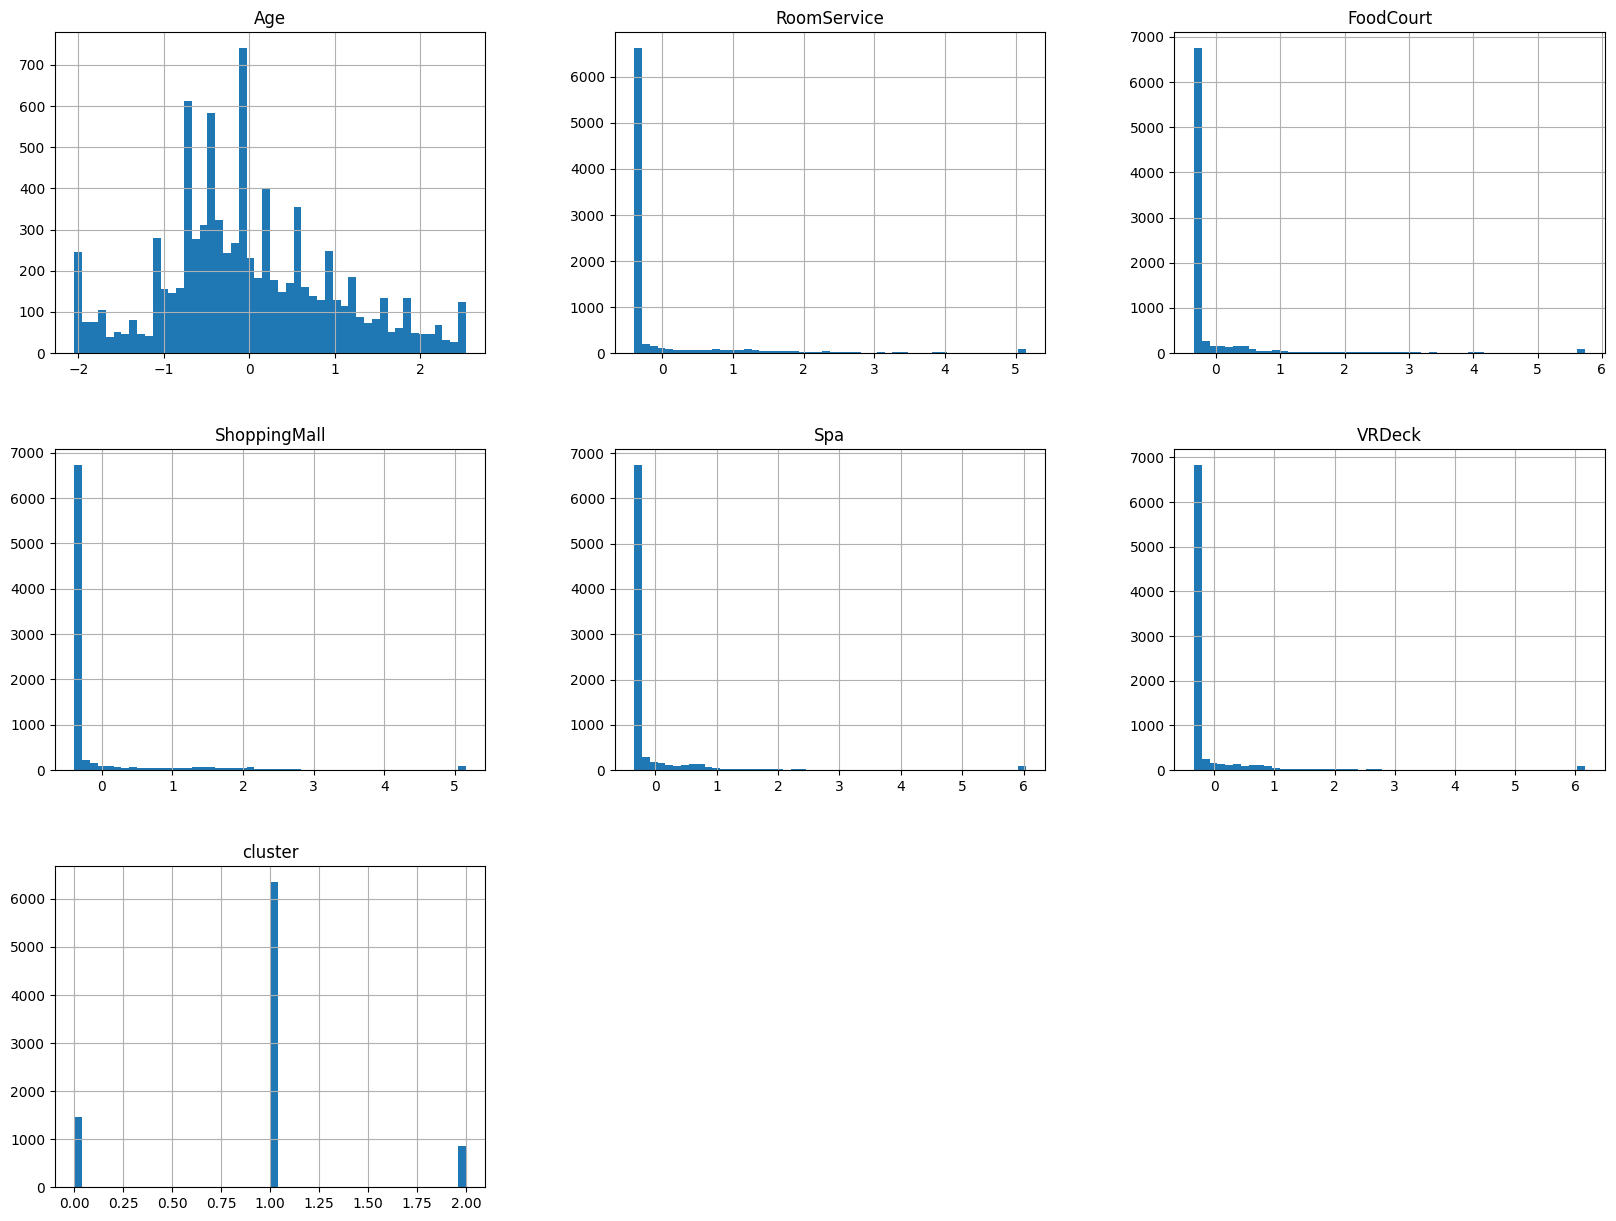

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

X_train.hist(bins=50, figsize=(20, 15));

In [ ]:
import pandas as pd
from colorama import Fore, Style
from tabulate import tabulate

In [ ]:
# Format DataFrame as a table
string_array = [f'{Fore.GREEN}True{Style.RESET_ALL}' if value else f'{Fore.RED}False{Style.RESET_ALL}' for value in y_pred]
submission = pd.DataFrame({'Boolean Column': string_array})


table_submission = tabulate(submission, headers='keys', tablefmt='fancy_grid')


╒══════╤══════════════════╕
│      │ Boolean Column   │
╞══════╪══════════════════╡
│    0 │ True             │
├──────┼──────────────────┤
│    1 │ False            │
├──────┼──────────────────┤
│    2 │ True             │
├──────┼──────────────────┤
│    3 │ True             │
├──────┼──────────────────┤
│    4 │ False            │
├──────┼──────────────────┤
│    5 │ False            │
├──────┼──────────────────┤
│    6 │ True             │
├──────┼──────────────────┤
│    7 │ True             │
├──────┼──────────────────┤
│    8 │ True             │
├──────┼──────────────────┤
│    9 │ False            │
├──────┼──────────────────┤
│   10 │ False            │
├──────┼──────────────────┤
│   11 │ False            │
├──────┼──────────────────┤
│   12 │ True             │
├──────┼──────────────────┤
│   13 │ True             │
├──────┼──────────────────┤
│   14 │ False            │
├──────┼──────────────────┤
│   15 │ False            │
├──────┼──────────────────┤
│   16 │ False      

In [ ]:
table_submission1 = y_pred  # The NumPy array containing the table data

# Convert the NumPy array to a DataFrame
df_pred = pd.DataFrame(table_submission1)

# Save the DataFrame as a CSV file
#df_pred.to_csv('pred.csv', index=False)

In [ ]:
pre_submission = pd.concat([X_test, df_pred], axis=1)

In [ ]:
column_names = pre_submission.columns.tolist()
column_names

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name',
 0]

In [ ]:
column_names[-1] = "Transported"

In [ ]:
ID = pre_submission.iloc[:, 0]  # Selecting the first column
Transported = pre_submission.iloc[:, -1]  # Selecting the last column

# Create a new dataset with only the first and last column
submission111 = pd.concat([ID, Transported], axis=1)

In [ ]:
submission111 = submission111.rename(columns={submission111.columns[-1]: "Transported"})



In [ ]:
submission111

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [ ]:
# Convert the NumPy array to a DataFrame
df_submission = pd.DataFrame(submission111)

# Save the DataFrame as a CSV file
df_submission.to_csv('submission111.csv', index=False)

In [ ]:
########################################################################################################################

In [ ]:
model = LogisticRegression()

In [ ]:
model = model.fit(X_train_encoded, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
predictions = model.predict(X_test_encoded)
predictions

array([ True, False,  True, ...,  True,  True,  True])

In [ ]:
predictions.shape

(4277,)

In [ ]:
from colorama import Fore, Style
from tabulate import tabulate
import pandas as pd



In [ ]:
# Format DataFrame as a table
string_array = [f'{Fore.GREEN}True{Style.RESET_ALL}' if value else f'{Fore.RED}False{Style.RESET_ALL}' for value in predictions]
submission = pd.DataFrame({'Boolean Column': string_array})


table_submission = tabulate(submission, headers='keys', tablefmt='fancy_grid')


╒══════╤══════════════════╕
│      │ Boolean Column   │
╞══════╪══════════════════╡
│    0 │ True             │
├──────┼──────────────────┤
│    1 │ False            │
├──────┼──────────────────┤
│    2 │ True             │
├──────┼──────────────────┤
│    3 │ True             │
├──────┼──────────────────┤
│    4 │ False            │
├──────┼──────────────────┤
│    5 │ False            │
├──────┼──────────────────┤
│    6 │ True             │
├──────┼──────────────────┤
│    7 │ True             │
├──────┼──────────────────┤
│    8 │ True             │
├──────┼──────────────────┤
│    9 │ True             │
├──────┼──────────────────┤
│   10 │ False            │
├──────┼──────────────────┤
│   11 │ False            │
├──────┼──────────────────┤
│   12 │ True             │
├──────┼──────────────────┤
│   13 │ True             │
├──────┼──────────────────┤
│   14 │ False            │
├──────┼──────────────────┤
│   15 │ False            │
├──────┼──────────────────┤
│   16 │ False      

In [ ]:
table_submission1 = predictions  # The NumPy array containing the table data

# Convert the NumPy array to a DataFrame
df_submission = pd.DataFrame(table_submission1)

# Save the DataFrame as a CSV file
df_submission.to_csv('submission.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pd_predictions = pd.DataFrame(predictions)

# Concatenate the original dataset and the new DataFrame column-wise
pre_submission = pd.concat([X_test, pd_predictions ], axis=1)

In [ ]:
pre_submission

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,0
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,-0.114147,False,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,Nelly Carsoning,True
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,-0.684313,False,-0.357339,-0.277879,-0.312173,2.287504,-0.246712,Lerome Peckers,False
2,0019_01,Europa,True,C/0/S,55 Cancri e,0.170937,False,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,Sabih Unhearfus,True
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,0.669832,False,-0.357339,4.121518,-0.312173,-0.104002,0.226648,Meratz Caltilter,True
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,-0.613042,False,-0.340723,-0.283840,0.832122,-0.267841,-0.246712,Brence Harperez,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,0.384749,False,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,Jeron Peter,True
4273,9269_01,Earth,False,G/160/P,TRAPPIST-1e,0.954916,False,-0.357339,0.277095,-0.281538,-0.258790,-0.130193,Matty Scheron,False
4274,9271_01,Mars,True,D/296/P,55 Cancri e,-0.185417,False,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,Jayrin Pore,True
4275,9273_01,Europa,False,D/297/P,TRAPPIST-1e,-0.185417,False,-0.357339,1.491019,-0.312173,-0.267841,0.176479,Kitakan Conale,True


In [ ]:
column_names = pre_submission.columns.tolist()
column_names

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name',
 0]

In [ ]:
column_names[-1] = "Transported"

In [ ]:
column_names

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name',
 'Transported']

In [ ]:
ID = pre_submission.iloc[:, 0]  # Selecting the first column
Transported = pre_submission.iloc[:, -1]  # Selecting the last column

# Create a new dataset with only the first and last column
submission = pd.concat([ID, Transported], axis=1)

In [ ]:
submission

,PassengerId,0
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [ ]:
submission = submission.rename(columns={submission.columns[-1]: "Transported"})



In [ ]:
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [ ]:
# Convert the NumPy array to a DataFrame
df_submission = pd.DataFrame(submission)

# Save the DataFrame as a CSV file
df_submission.to_csv('submission117.csv', index=False)